## Objective
Perform K-Means clustering to segment customers into different groups based on their annual income and spending score.

The "Annual Income (k$)" and "Spending Score (1-100)" columns will be used as features for clustering.
The "Gender" column can be ignored for clustering, as we are not using it for the current task.
Feature Description

In [39]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore future warnings
import warnings
warnings.filterwarnings("ignore")

#load the dataset
data = pd.read_csv('/Users/user/Desktop/Data Science/python_files/files_for_data_wrangling/Mall_Customers.csv')

#### Data Preprocessing

In [43]:
#Split the dataset into feature and target variable

X = data.iloc[:, [3,4]].values
y = data.iloc[:, 1].values

In [45]:
#check for missing values.
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
# Standardize the features Annual Income and Spending Score using StandardScaler.

#import library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### Perform K-Means Clustering

In [50]:
from sklearn.cluster import KMeans

#K-Means with k=5 and set n_init to suppress warning
k_means = KMeans(n_clusters=5, n_init=10, random_state=42)
k_means.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

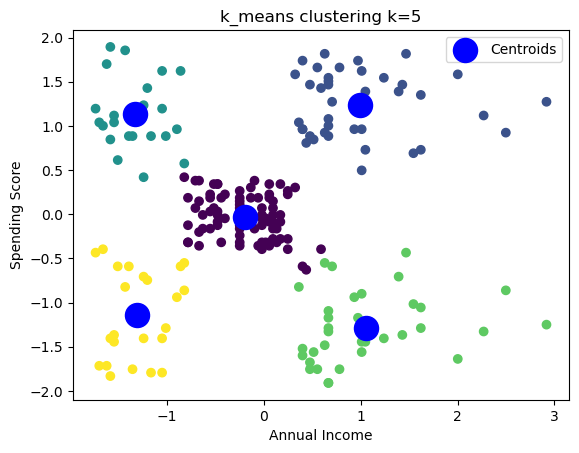

In [52]:
# Visualize the clusters

plt.scatter(X_scaled[:,0], X_scaled[:, 1], c=k_means.labels_, cmap='viridis')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("k_means clustering k=5")
plt.legend()
plt.show()

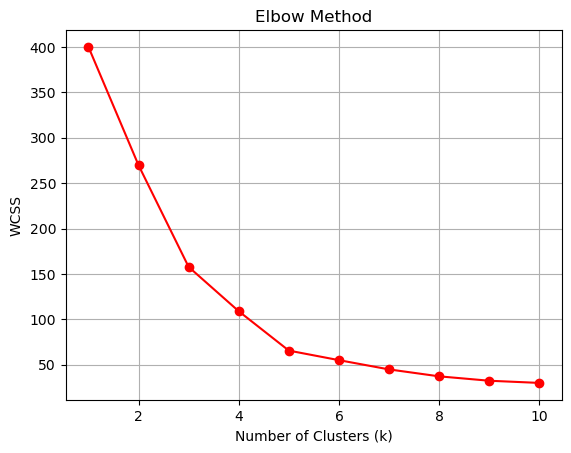

In [57]:
#identify the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

#### Hyperparamerter Tuning

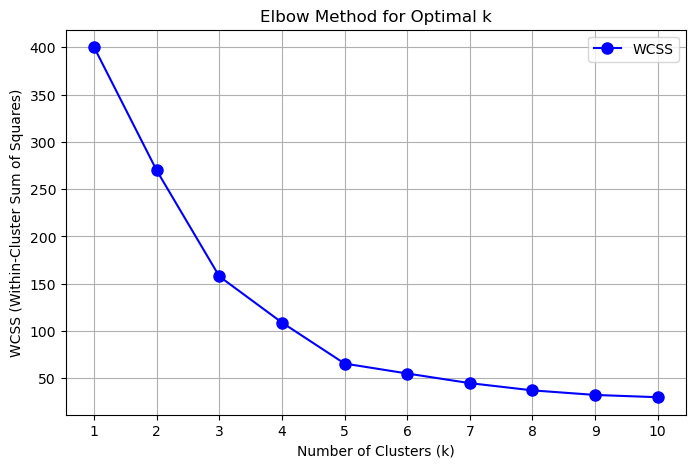

In [60]:
# Perform the Elbow Method to find the optimal value of k (number of clusters).
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8, label="WCSS")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

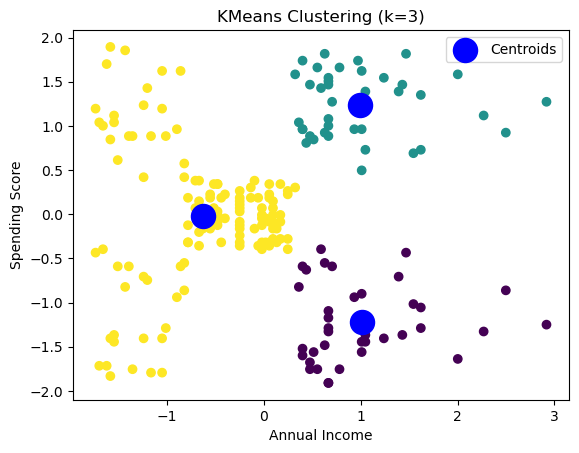

In [62]:
# Try k = 3
k_means_3 = KMeans(n_clusters=3, n_init=10, random_state=42)
k_means_3.fit(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:, 1], c=k_means_3.labels_, cmap='viridis')
plt.scatter(k_means_3.cluster_centers_[:, 0], k_means_3.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("KMeans Clustering (k=3)")
plt.legend()
plt.show()

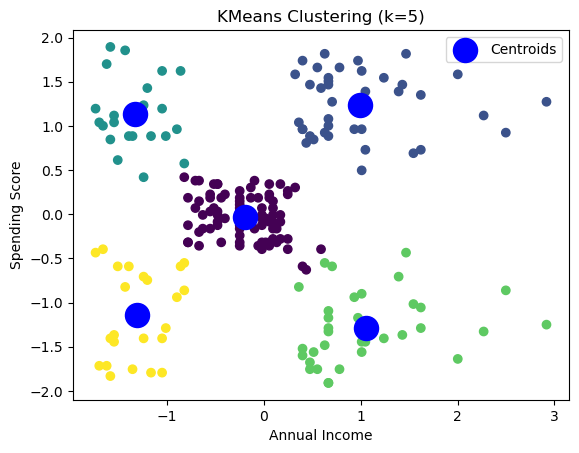

In [66]:
# Try k = 5
k_means_5 = KMeans(n_clusters=5, n_init=10, random_state=42)
k_means_5.fit(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:, 1], c=k_means_5.labels_, cmap='viridis')
plt.scatter(k_means_5.cluster_centers_[:, 0], k_means_5.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("KMeans Clustering (k=5)")
plt.legend()
plt.show()

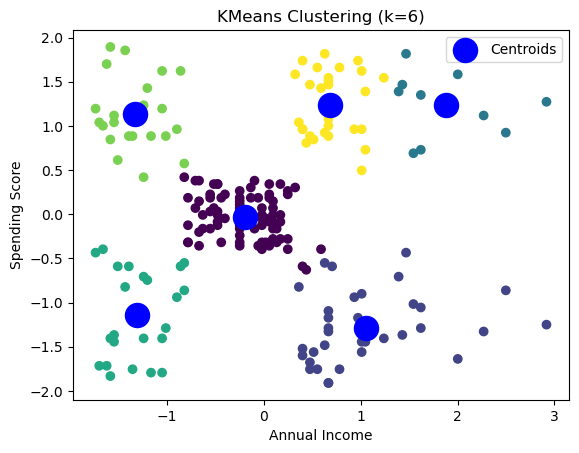

In [68]:
# Try k = 6
k_means_6 = KMeans(n_clusters=6, n_init=10, random_state=42)
k_means_6.fit(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:, 1], c=k_means_6.labels_, cmap='viridis')
plt.scatter(k_means_6.cluster_centers_[:, 0], k_means_6.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("KMeans Clustering (k=6)")
plt.legend()
plt.show()

#### Model Evaluation

In [77]:
# Label the dataset with cluster assignments and examine the resulting clusters.
data['cluster'] = k_means.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [81]:
#number of each cluster in the data
data['cluster'].value_counts()

cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

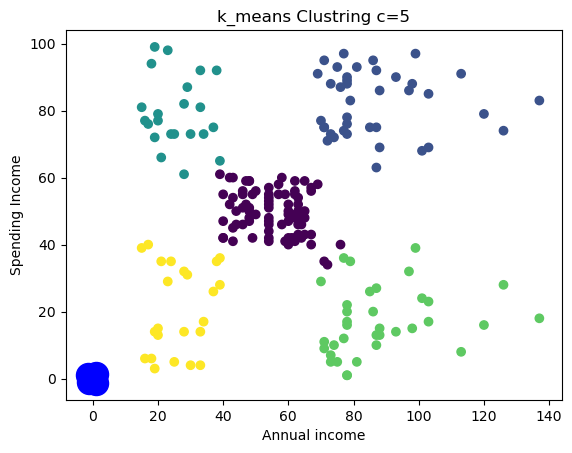

In [85]:
# Plot a scatter plot to visualize the clusters and their centroids (for two features: Annual Income vs. Spending Score).

plt.scatter (data.iloc[:, 3], data.iloc[:, 4], c=k_means.labels_, cmap='viridis')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids')
plt.xlabel("Annual income")
plt.ylabel("Spending Income")
plt.title("k_means Clustring c=5")
plt.show()

In [89]:
#evaluate the quality of your K-Means clustering
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, k_means.labels_)
print("Silhouette_avg is: ",silhouette_avg )

Silhouette_avg is:  0.5546571631111091


By seeing the silhouette score we can say:

1. Customers are well matched to their own cluster.
2. There is reasonable separation between different clusters.
3. Not perfect, but definitely meaningful segmentation.